# **Spatial Data Structures and its Methods and Attributes**
In Geopandas, the spatial data structure is based on the GeoDataFrame, which is an extension of the pandas DataFrame with additional functionality to handle geospatial data. The spatial data structure in Geopandas allows you to work with spatially referenced data, such as points, lines, and polygons, within a tabular framework. A GeoDataFrame and a GeoSeries are two fundamental components of the Geopandas library, which extends the capabilities of pandas for working with geospatial data.

**1. GeoDataFrame:**
A GeoDataFrame is a tabular data structure that extends the functionality of pandas DataFrame by incorporating a "geometry" column. This column stores geometric objects associated with each row of the DataFrame. The geometries can represent points, lines, polygons, or other spatial entities.

**Key features:**

* **DataFrame Structure:** A GeoDataFrame retains the tabular structure of a pandas DataFrame, allowing for efficient indexing, filtering, and manipulation of both the attribute data and geometric information.
* **Geometry Column:** The "geometry" column in a GeoDataFrame contains the geometric objects representing the spatial features. It can store single geometries or collections of geometries.
* **Attribute Data:** A GeoDataFrame can have additional columns that store attribute data related to the spatial features. These columns can contain various information such as names, IDs, population figures, or any other relevant attributes.
* **Coordinate Reference System (CRS):** A GeoDataFrame includes information about the Coordinate Reference System, defining the spatial reference and coordinate system used by the geometries.
* **Integration with Spatial Operations:** The GeoDataFrame integrates with Geopandas' spatial operations, allowing for geometric manipulations, spatial joins, spatial queries, and other spatial analysis tasks.

**2. GeoSeries:**
A GeoSeries, on the other hand, is a one-dimensional array-like object that represents a series of geometric objects. It is based on pandas' Series but is specifically designed to handle spatial data.

**Key features:**

* **Series-like Behavior:** A GeoSeries shares many similarities with a pandas Series, such as indexing, slicing, and applying functions or operations element-wise.
* **Geometry Storage:** The primary purpose of a GeoSeries is to store and manage geometric objects. Each element of the series represents a single geometry, such as a point, line, or polygon.
* **Coordinate Reference System (CRS):** A GeoSeries also includes information about the Coordinate Reference System, providing spatial reference and coordinate system details for the geometries within the series.
* **Integration with Spatial Operations:** Similar to a GeoDataFrame, a GeoSeries integrates with Geopandas' spatial operations, allowing for geometric manipulations, spatial queries, and other spatial analysis tasks at the individual geometry level.

## **01. Importing Required Libraries**

In [11]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **02. Setting Up the Working Directory**

In [12]:
# Printing the current working directory
os.getcwd()

'D:\\Coding\\Git Repository\\Geospatial_Data_Science_with_Python\\Datasets\\Shapefiles'

In [13]:
# Changing the current working directory
file_path = r"D:\Coding\Git Repository\Geospatial_Data_Science_with_Python\Datasets\Shapefiles"
os.chdir(file_path)

In [14]:
# Checking the current working directory again
os.getcwd()

'D:\\Coding\\Git Repository\\Geospatial_Data_Science_with_Python\\Datasets\\Shapefiles'

In [15]:
# Printing all the shapefile names of the current working directory
for item in os.listdir():
    if item.endswith(".shp"):
        print(item)

ca_cbsas.shp
ne_10m_land.shp
ne_10m_populated_places_simple.shp
ne_110m_graticules_10.shp


## **03. Reading Spatial Data with GeoPandas**

In [16]:
# Reading the ne_10m_land dataset
land = gpd.read_file(file_path + "\\ne_10m_land.shp")

In [17]:
# Checking the first 5 rows of the shapefile
land.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,0,0.0,"MULTIPOLYGON (((-0.00029 -71.49903, 0.01555 -7..."
1,Land,6,5.0,"MULTIPOLYGON (((166.13697 -50.86435, 166.20525..."
2,Land,5,3.0,"MULTIPOLYGON (((-78.78897 -33.60906, -78.78038..."
3,Land,6,6.0,"MULTIPOLYGON (((163.98512 -20.04762, 163.98609..."
4,Land,5,4.0,"MULTIPOLYGON (((134.70737 -6.58904, 134.72006 ..."


In [18]:
# Checking the datatype of the land variable
type(land)

geopandas.geodataframe.GeoDataFrame

In [19]:
# Checking the datatype of the geometry column of the land geodataframe
type(land["geometry"])

geopandas.geoseries.GeoSeries

## **04. Attributes of GeoSeries Data Structure**

In [20]:
# Defining the geometry column in a seperate variable
land_geometry = land["geometry"]

In [21]:
# Checking the type of land_geometry_variable
type(land_geometry)

geopandas.geoseries.GeoSeries

**crs:** <br>
The crs attribute stores the spatial reference and coordinate system information associated with the geometries in the GeoSeries. It provides metadata about how the coordinates are interpreted and projected in the real world.

In [22]:
# Checking the CRS information of the geometry using crs() attribute
land_geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**geom_type:**<br>
The geom_type attribute returns the geometry type of each geometry in the GeoSeries. It indicates whether each geometry is a point, line, polygon, or another geometric type.

In [23]:
# Checking the geometry type of each feature in the GeoSeries
print(land_geometry.geom_type)

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
3    MultiPolygon
4    MultiPolygon
5    MultiPolygon
6    MultiPolygon
7    MultiPolygon
8    MultiPolygon
9         Polygon
dtype: object


**area:**<br>
The area attribute calculates the area of each geometry in the GeoSeries. The area is computed based on the spatial reference system (CRS) of the GeoSeries.

In [24]:
# Calculating the area of each geometry in the GeoSeries
land_geometry.area

0    21170.379774
1        6.152861
2       27.611684
3        4.906317
4        7.303752
5       54.187192
6       95.651467
7       22.911880
8       38.749748
9        0.000084
dtype: float64

**bounds:**<br>
The bounds attribute returns a bounding box (or minimum bounding rectangle) for each geometry in the GeoSeries. The bounding box represents the minimum and maximum x and y coordinates that enclose the geometry.

In [25]:
# Checking the bounding box for each geometry
land_geometry.bounds

,minx,miny,maxx,maxy
0,-180.000000,-90.000000,180.000000,83.634101
1,-178.858876,-79.183282,179.952403,81.633938
2,-180.000000,-83.148370,180.000000,82.119940
3,-179.336130,-73.396417,179.952647,80.174872
4,-179.871938,-83.226821,180.000000,82.896633
5,-176.977895,-81.598891,180.000000,81.564765
6,-180.000000,-80.960382,169.364431,80.933498
7,-171.852895,-79.696873,180.000000,81.205268
8,-156.060164,-77.397393,178.711436,83.365912
9,-0.004789,-0.004390,0.004328,0.004817


**total_bounds:**<br>
The total_bounds attribute returns the overall bounding box that encompasses all geometries in the GeoSeries. It provides the minimum and maximum x and y coordinates that cover the entire collection of geometries.

In [26]:
# Checking the overall bounding box of the geometries
land_geometry.total_bounds

array([-180.        ,  -90.        ,  180.        ,   83.63410065])

## **05. Methods of GeoSeries Data Structure**

**to_crs:**<br>
The to_crs method allows you to transform the coordinate reference system (CRS) of the geometries in a GeoSeries. It takes a CRS object or a string representation of a CRS as its argument. By applying to_crs, you can reproject the geometries to a different CRS, enabling spatial analysis and visualization in a consistent coordinate system.

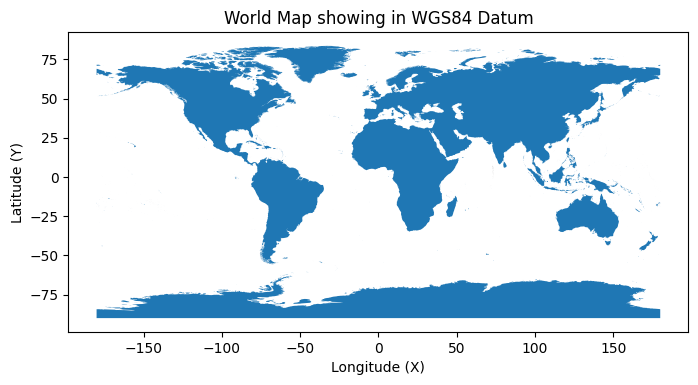

In [27]:
# Plotting the land_geometry map with the default WGS_84 Datum
fig, ax = plt.subplots(figsize=(8, 6))
land_geometry.plot(ax=ax)
plt.title("World Map showing in WGS84 Datum")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.show()

In [28]:
# Changing the CRS of the land_geometry to the Robinson Projection
reprojected_land = land_geometry.to_crs("ESRI:54030")
# Checking the reprojected CRS
reprojected_land.crs

<Derived Projected CRS: ESRI:54030>
Name: World_Robinson
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Robinson
- method: Robinson
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

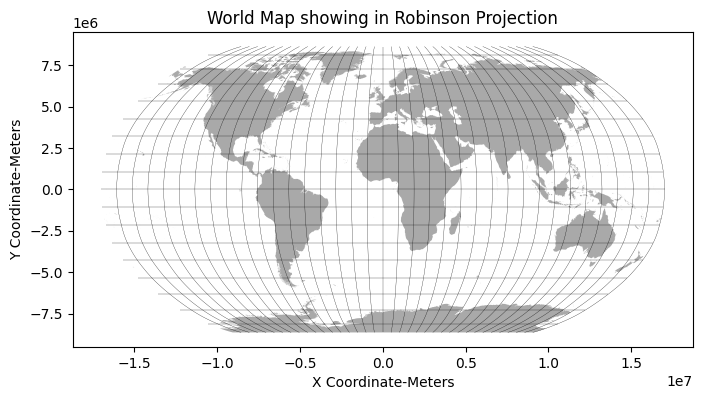

In [29]:
# Reading a 10 degree graticules file with geopandas
grat = gpd.read_file(file_path + "\\ne_110m_graticules_10.shp").to_crs("ESRI:54030")
# Plotting the reprojected_land
fig, ax = plt.subplots(figsize=(8, 6))
reprojected_land.plot(ax=ax, color="darkgray")
grat.plot(ax=ax, color="black", linewidth=0.2)
plt.title("World Map showing in Robinson Projection")
plt.xlabel("X Coordinate-Meters")
plt.ylabel("Y Coordinate-Meters")
plt.show()

**centroid:** <br>
The centroid method computes the centroid (geometric center) of each polygon geometry in a GeoSeries. It returns a new GeoSeries with the centroid points as geometries. This method is applicable only to GeoSeries containing polygon geometries.

In [30]:
# Defining the bounding box for the North America
bounds = (-125.0, 24.0, -66.0, 49.0)

In [31]:
# Reading the us_state shapefile with geopandas and filtering with the bounding box
us_state = gpd.read_file(file_path + "\\tl_2021_us_state.zip", bbox=bounds)

In [32]:
# Checking the us_state GeoDataframe
us_state.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."


In [33]:
# Checking the CRS of the us_state file
us_state.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [34]:
# Calculating the centroids of all the ploygons in the us_state data
us_centroids = us_state["geometry"].centroid

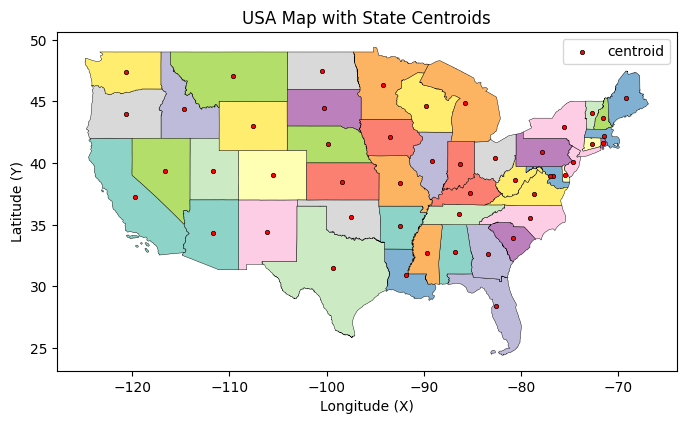

In [35]:
# Plotting the us_state and us_centroids to a map
fig, ax = plt.subplots(figsize=(8, 6))
us_state.plot(ax=ax, 
              cmap="Set3", 
              column="GEOID",
              linewidth=0.3,
              edgecolor="black")
us_centroids.plot(ax=ax, 
                  color="red",
                  edgecolor="black",
                  markersize=10,
                  linewidth=0.5,
                  label="centroid")
plt.title("USA Map with State Centroids")
plt.xlabel("Longitude (X)")
plt.ylabel("Latitude (Y)")
plt.legend()
plt.show()

**distance:** <br>
The distance method calculates the Euclidean distance between each geometry in a GeoSeries and a provided geometry. The provided geometry can be a single point, line, or polygon. The method returns a new GeoSeries with the distances calculated for each geometry.

In [36]:
# Adding the centroid values in a separate column in us_states GeoDataframe
us_state["centroid"] = us_centroids

In [37]:
# Checking the column names after adding the centroid column
us_state.columns

Index(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME',
       'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'centroid'],
      dtype='object')

In [38]:
# Extracting the centroid value of the California state
california_centroid = us_state["centroid"][us_state["NAME"]=="California"].to_crs("EPSG:32610").values
# Extracting the centroid value of the Oregon state
oregon_centroid = us_state["centroid"][us_state["NAME"]=="Oregon"].to_crs("EPSG:32610").values

In [39]:
# Checking the CRS of the california_centroid
california_centroid.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
# Printing the centroid value of the California and New York States
print("California Centroid:", california_centroid)
print("Oregon Centroid:", oregon_centroid)

California Centroid: <GeometryArray>
[<POINT (796041.741 4123976.423)>]
Length: 1, dtype: geometry
Oregon Centroid: <GeometryArray>
[<POINT (692190.417 4868046.751)>]
Length: 1, dtype: geometry


In [41]:
# Calculating the distance between California and New York using distance() method
CA_OR_distance = california_centroid.distance(oregon_centroid)
# Converting the distance into kilometers
distance_km = CA_OR_distance[0] / 1000
# Printing the distance
print("The euclidean distance between California and Oregon is", 
      round(distance_km, 2), 
      "Kilometers.")

The euclidean distance between California and Oregon is 751.28 Kilometers.
